# `find_peaks`
Finds local peaks in the distance transform.  This is need for watershed segmentations.

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
from edt import edt
import inspect
np.random.seed(11)
ps.visualization.set_mpl_style()
inspect.signature(ps.filters.find_peaks)

<Signature (dt, r_max=4, strel=None, sigma=None, divs=1)>

## `dt`
The distance transform must be provided

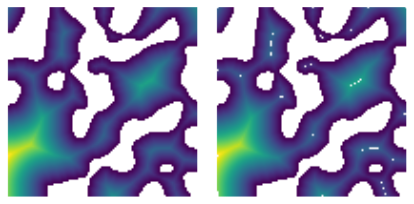

In [2]:
im = ps.generators.blobs(shape=[100, 100], blobiness=0.5, porosity=0.7)
dt = edt(im)

fig, ax = plt.subplots(1, 2, figsize=[6, 3])

pk = ps.filters.find_peaks(dt=dt)
ax[0].imshow(dt/im)
ax[0].axis(False)

ax[1].imshow(dt/im/~pk)
ax[1].axis(False);

## `r_max`
The radius that should be searched for local maxima.

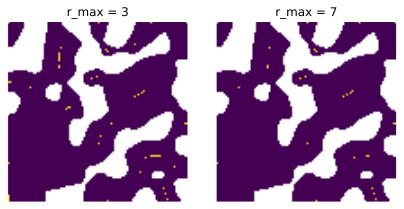

In [3]:
fig, ax = plt.subplots(1, 2, figsize=[6, 3])

r_max = 3
pk = ps.filters.find_peaks(dt=dt, r_max=r_max)
ax[0].imshow(pk/im)
ax[0].axis(False)
ax[0].set_title(f'r_max = {r_max}')

r_max = 7
pk = ps.filters.find_peaks(dt=dt, r_max=r_max)
ax[1].imshow(pk/im)
ax[1].axis(False)
ax[1].set_title(f'r_max = {r_max}');

## `strel`
The structuring element to use, in the form of a function handle. The value of `r_max` is passed to this function, so note that the meaning for `r` differs depending on the strel used. The default is a disk/ball. 

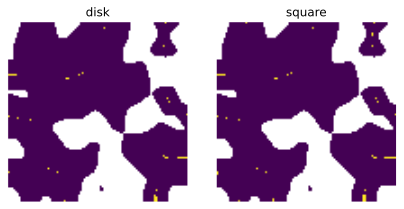

In [4]:
im = ps.generators.blobs(shape=[100, 100], blobiness=0.5, porosity=0.7)
dt = edt(im)

from skimage.morphology import disk, square

fig, ax = plt.subplots(1, 2, figsize=[6, 3])

pk = ps.filters.find_peaks(dt=dt, strel=disk(3))
ax[0].imshow(pk/im)
ax[0].axis(False)
ax[0].set_title('disk')

pk = ps.filters.find_peaks(dt=dt, strel=square(5))
ax[1].imshow(pk/im)
ax[1].axis(False)
ax[1].set_title('square');